# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Loading data

In [2]:
test_data=pd.read_csv("test.csv",encoding_errors="ignore")
train_data=pd.read_csv("train.csv",encoding_errors="ignore")
store_data=pd.read_csv("store.csv",encoding_errors="ignore")
sample_data=pd.read_csv("sample_submission.csv",encoding_errors="ignore")

# Data visualization

In [3]:
test_data

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [25]:
# Display the shape of the training data
print(f"The shape of the training data is: {test_data.shape}")

# Show the first few rows of the training data
test_data.head()

The shape of the training data is: (41088, 8)


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [5]:
test_data.tail()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0
41087,41088,1115,6,2015-08-01,1.0,0,0,1


In [6]:
# check missing values for test data
test_data.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [39]:
test_data.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


In [40]:
test_data.dtypes

Id                 int64
Store              int64
DayOfWeek          int64
Date              object
Open             float64
Promo              int64
StateHoliday      object
SchoolHoliday      int64
dtype: object

In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [10]:
test_data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
41083    False
41084    False
41085    False
41086    False
41087    False
Length: 41088, dtype: bool

In [11]:
train_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [27]:
# Display the shape of the training data
print(f"The shape of the training data is: {train_data.shape}")

# Show the first few rows of the training data
train_data.head()

The shape of the training data is: (1017209, 9)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [13]:
train_data.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [14]:
# check missing values for train data
train_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [41]:
train_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [42]:
train_data.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [18]:
train_data.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1017204    False
1017205    False
1017206    False
1017207    False
1017208    False
Length: 1017209, dtype: bool

In [19]:
store_data

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [28]:
# Display the shape of the training data
print(f"The shape of the training data is: {store_data.shape}")

# Show the first few rows of the training data
store_data.head()

The shape of the training data is: (1115, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [21]:
store_data.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [22]:
# check missing values for store data
store_data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [43]:
store_data.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [44]:
store_data.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [29]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [30]:
store_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1110    False
1111    False
1112    False
1113    False
1114    False
Length: 1115, dtype: bool

In [31]:
sample_data

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


In [32]:
# Display the shape of the training data
print(f"The shape of the training data is: {sample_data.shape}")

# Show the first few rows of the training data
sample_data.head()

The shape of the training data is: (41088, 2)


,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [33]:
sample_data.tail()

,Id,Sales
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0
41087,41088,0


In [34]:
sample_data.describe()

,Id,Sales
count,41088.000000,41088.0
mean,20544.500000,0.0
std,11861.228267,0.0
min,1.000000,0.0
25%,10272.750000,0.0
50%,20544.500000,0.0
75%,30816.250000,0.0
max,41088.000000,0.0


In [35]:
sample_data.dtypes

Id       int64
Sales    int64
dtype: object

In [36]:
sample_data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
41083    False
41084    False
41085    False
41086    False
41087    False
Length: 41088, dtype: bool

In [37]:
# check missing values for sample data
sample_data.isnull().sum()

Id       0
Sales    0
dtype: int64

In [38]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Id      41088 non-null  int64
 1   Sales   41088 non-null  int64
dtypes: int64(2)
memory usage: 642.1 KB


In [50]:
# Display the first 10 rows of sample_data explicitly
print("The first 10 rows of the data are:")
test_data.head(10)

The first 10 rows of the data are:


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
5,6,10,4,2015-09-17,1.0,1,0,0
6,7,11,4,2015-09-17,1.0,1,0,0
7,8,12,4,2015-09-17,1.0,1,0,0
8,9,13,4,2015-09-17,1.0,1,0,0
9,10,14,4,2015-09-17,1.0,1,0,0


In [51]:
print("The first 10 rows of the data are:")
train_data.head(10)

The first 10 rows of the data are:


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [53]:
print("The first 10 rows of the data are:")
store_data.head(10)

The first 10 rows of the data are:


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [54]:
print("The first 10 rows of the data are:")
sample_data.head(10)

The first 10 rows of the data are:


,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


In [55]:
# Dictionary to store datasets and their names
datasets = {
    "Test Columns": test_data,
    "Train Columns": train_data,
    "Store Columns": store_data,
    "Sample Columns": sample_data
}

# Loop through the datasets and print their column names
for name, data in datasets.items():
    print(f"\t{name}\n{list(data.columns)}\n")


	Test Columns
['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']

	Train Columns
['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']

	Store Columns
['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

	Sample Columns
['Id', 'Sales']



In [56]:
# Dictionary to store datasets and their names
datasets = {
    "Test Shape": test_data,
    "Train Shape": train_data,
    "Store Shape": store_data,
    "Sample Shape": sample_data
}

# Loop through the datasets and print their shapes
for name, data in datasets.items():
    print(f"\t{name}: {data.shape}\n")


	Test Shape: (41088, 8)

	Train Shape: (1017209, 9)

	Store Shape: (1115, 10)

	Sample Shape: (41088, 2)



In [57]:
def percent_missing(df):
    """
    Calculate the percentage of missing values in the dataset.
    """
    # Calculate the percentage of missing values
    total_cells = np.product(df.shape)
    total_missing = df.isnull().sum().sum()
    percent_missing = (total_missing / total_cells) * 100
    return round(percent_missing, 2)

# Call the function and display the result
datasets = {"train": train_data, "test": test_data}

for data_type, df in datasets.items():
    missing_percentage = percent_missing(df)
    print(f"The {data_type} dataset contains {missing_percentage}% missing values.")


The train dataset contains 0.0% missing values.
The test dataset contains 0.0% missing values.


In [58]:
test_data

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [59]:
train_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


# Task 1 - Exploration of customer purchasing behaviour

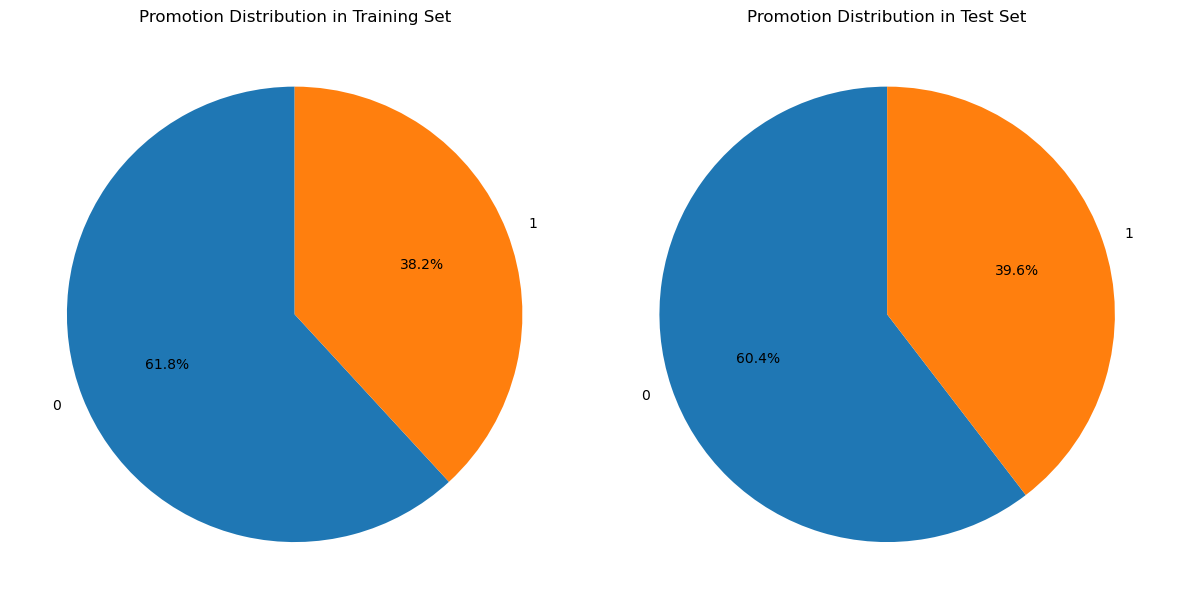

In [60]:
def plot_promotion_distribution(data, ax, title):
    """
    Plot the promotion distribution as a pie chart.
    
    Parameters:
    - data: Series containing promotion counts
    - ax: Matplotlib axis to plot on
    - title: Title of the chart
    """
    ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(title)

# Calculate the promotion distribution in train and test datasets
train_promotion_counts = train_data['Promo'].value_counts()
test_promotion_counts = test_data['Promo'].value_counts()

# Create subplots and plot the distributions
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
plot_promotion_distribution(train_promotion_counts, axs[0], 'Promotion Distribution in Training Set')
plot_promotion_distribution(test_promotion_counts, axs[1], 'Promotion Distribution in Test Set')

plt.tight_layout()
plt.show()


In [61]:
# Calculate Q1, Median (Q2), and Q3 using pandas
q1, q2, q3 = train_data["Sales"].quantile([0.25, 0.5, 0.75])

# Display the results
print(f"My Q1 = {q1}, Median(Q2) = {q2}, Q3 = {q3}")


My Q1 = 3727.0, Median(Q2) = 5744.0, Q3 = 7856.0


In [62]:
def calculate_iqr_ranges(q1, q3, factor=1.5):
    """
    Calculate the IQR and lower/upper range for outliers.
    
    Parameters:
    - q1: First quartile
    - q3: Third quartile
    - factor: Multiplier for the IQR (default is 1.5)

    Returns:
    - A tuple containing the lower and upper range.
    """
    iqr = q3 - q1
    lower_range = q1 - iqr * factor
    upper_range = q3 + iqr * factor
    return lower_range, upper_range

# Calculate lower and upper range using the function
lower_range, upper_range = calculate_iqr_ranges(q1, q3)

# Display the result
print(f"Lower range = {lower_range}, Upper Range = {upper_range}")


Lower range = -2466.5, Upper Range = 14049.5


In [66]:
#  first quartile (Q1) and third quartile (Q3) for the "Sales" column
Q1_sales = train_data['Sales'].quantile(0.25)
Q3_sales = train_data['Sales'].quantile(0.75)

# interquartile range (IQR) for "Sales"
IQR_sales = Q3_sales - Q1_sales

# lower and upper bounds for outlier detection for "Sales"
lower_range_sales = Q1_sales - 1.5 * IQR_sales
upper_range_sales = Q3_sales + 1.5 * IQR_sales

# Identifying outliers in the "Sales" column
outliers_lower_sales = train_data[train_data['Sales'] < lower_range_sales]
outliers_upper_sales = train_data[train_data['Sales'] > upper_range_sales]

print(f"Outliers (lower bound): {outliers_lower_sales['Sales'].values}")
print(f"Outliers (upper bound): {outliers_upper_sales['Sales'].values}")

Outliers (lower bound): []
Outliers (upper bound): [15344 14190 14180 ... 20355 20642 17267]


In [67]:
train_data['Sales'] = train_data['Sales'].clip(lower_range_sales, upper_range_sales)

In [68]:
Q1 = train_data['Customers'].quantile(0.25)
Q3 = train_data['Customers'].quantile(0.75)

#interquartile range (IQR)
IQR = Q3 - Q1

# lower and upper bounds for outlier detection
lower_range = Q1 - 1.5 * IQR
upper_range = Q3 + 1.5 * IQR

# Identifying outliers in the "Customers" column
outliers_lower = train_data[train_data['Customers'] < lower_range]
outliers_upper = train_data[train_data['Customers'] > upper_range]

print(f"Outliers (lower bound): {outliers_lower['Customers'].values}")
print(f"Outliers (upper bound): {outliers_upper['Customers'].values}")

Outliers (lower bound): []
Outliers (upper bound): [1498 1586 2041 ... 1751 1675 2377]


## Check & compare sales behavior before, during and after holidays

In [69]:
# Convert 'Date' column to datetime format using method chaining
train_data = train_data.assign(Date=pd.to_datetime(train_data['Date']))

# Importing LinearRegression in a different style (one-liner import)
from sklearn.linear_model import LinearRegression


In [70]:
train_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263.0,555,1,1,0,1
1,2,5,2015-07-31,6064.0,625,1,1,0,1
2,3,5,2015-07-31,8314.0,821,1,1,0,1
3,4,5,2015-07-31,13995.0,1498,1,1,0,1
4,5,5,2015-07-31,4822.0,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0.0,0,0,0,a,1
1017205,1112,2,2013-01-01,0.0,0,0,0,a,1
1017206,1113,2,2013-01-01,0.0,0,0,0,a,1
1017207,1114,2,2013-01-01,0.0,0,0,0,a,1


In [71]:
train_data.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0.0,0,0,0,a,1
1017205,1112,2,2013-01-01,0.0,0,0,0,a,1
1017206,1113,2,2013-01-01,0.0,0,0,0,a,1
1017207,1114,2,2013-01-01,0.0,0,0,0,a,1
1017208,1115,2,2013-01-01,0.0,0,0,0,a,1


In [73]:
# Function to classify dates into 'before', 'during', and 'after' holidays
def classify_holiday_period(date, holiday_start, holiday_end):
    if date < holiday_start:
        return 'Before'
    elif date >= holiday_start and date <= holiday_end:
        return 'During'
    else:
        return 'After'

In [74]:
holiday_start = pd.to_datetime('2015-07-31')
holiday_end = pd.to_datetime('2013-01-01')

In [75]:
# Add a new column to the DataFrame to classify sales periods
train_data['StateHoliday'] = train_data['Date'].apply(lambda x: classify_holiday_period(x, holiday_start, holiday_end))

In [76]:
X = train_data[['StateHoliday', 'SchoolHoliday']]
y = train_data['Sales']

In [77]:
X = pd.get_dummies(X)

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

def train_model(X, y, test_size=0.2, random_state=42):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    return model, X_test, y_test

# Call the function and get the model and test data
model, X_test, y_test = train_model(X, y)


In [79]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [80]:
train_data['Sales'] = model.predict(X)

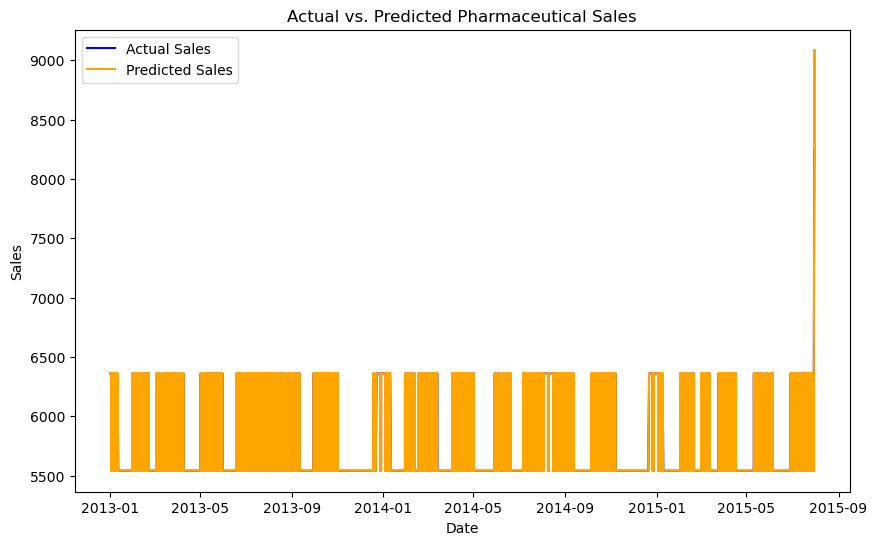

In [81]:
import matplotlib.pyplot as plt

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the actual and predicted sales on the same axis
ax.plot(train_data['Date'], train_data['Sales'], label='Actual Sales', color='blue')
ax.plot(train_data['Date'], train_data['Sales'], label='Predicted Sales', color='orange')

# Adding labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
ax.set_title('Actual vs. Predicted Pharmaceutical Sales')

# Display the legend
ax.legend()

# Show the plot
plt.show()


In [82]:
train_data1=pd.read_csv("train.csv",encoding_errors="ignore")

In [83]:
train_data1

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [84]:
 # Assuming '1' indicates holidays, create a new column 'Holiday' to indicate whether it's a holiday or not
train_data1['Holiday'] = train_data1['StateHoliday'].apply(lambda x: 1 if x != '0' else 0)

In [85]:
# Split the data into three groups: before holiday, during holiday, and after holiday
before_holiday_sales = train_data1[train_data1['Holiday'] == 0]['Sales']
during_holiday_sales = train_data1[train_data1['Holiday'] == 1]['Sales']
after_holiday_sales = train_data1[train_data1['Holiday'].shift(-1) == 1]['Sales']  # Shift to identify after holiday
# Calculate the average sales for each group
average_sales_before_holiday = before_holiday_sales.mean()
average_sales_during_holiday = during_holiday_sales.mean()
average_sales_after_holiday = after_holiday_sales.mean()

In [86]:
average_sales_before_holiday 

5980.279716566853

In [87]:
average_sales_during_holiday

4684.874236685952

In [88]:
average_sales_after_holiday

4787.798768828413

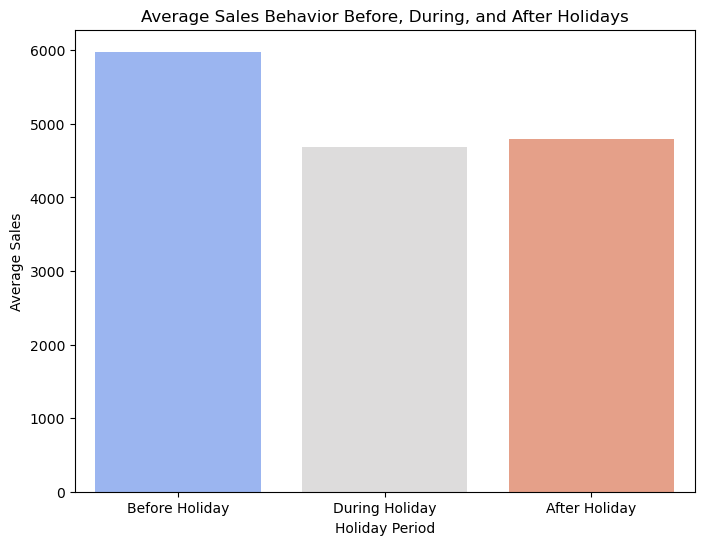

In [89]:
# Create a DataFrame to store the categories and their corresponding average sales
data = {
    'Holiday Period': ['Before Holiday', 'During Holiday', 'After Holiday'],
    'Average Sales': [average_sales_before_holiday, average_sales_during_holiday, average_sales_after_holiday]
}

df = pd.DataFrame(data)

# Plot using seaborn barplot
plt.figure(figsize=(8, 6))
sns.barplot(x='Holiday Period', y='Average Sales', data=df, palette='coolwarm')

# Add titles and labels
plt.title('Average Sales Behavior Before, During, and After Holidays')
plt.ylabel('Average Sales')

# Display the plot
plt.show()


## Find out any seasonal (Christmas, Easter etc) purchase behaviours

In [90]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [91]:
train_data1['Date'] = pd.to_datetime(train_data1['Date'])

In [92]:
train_data1['Month'] =train_data1['Date'].dt.month
train_data1['Day'] = train_data1['Date'].dt.day

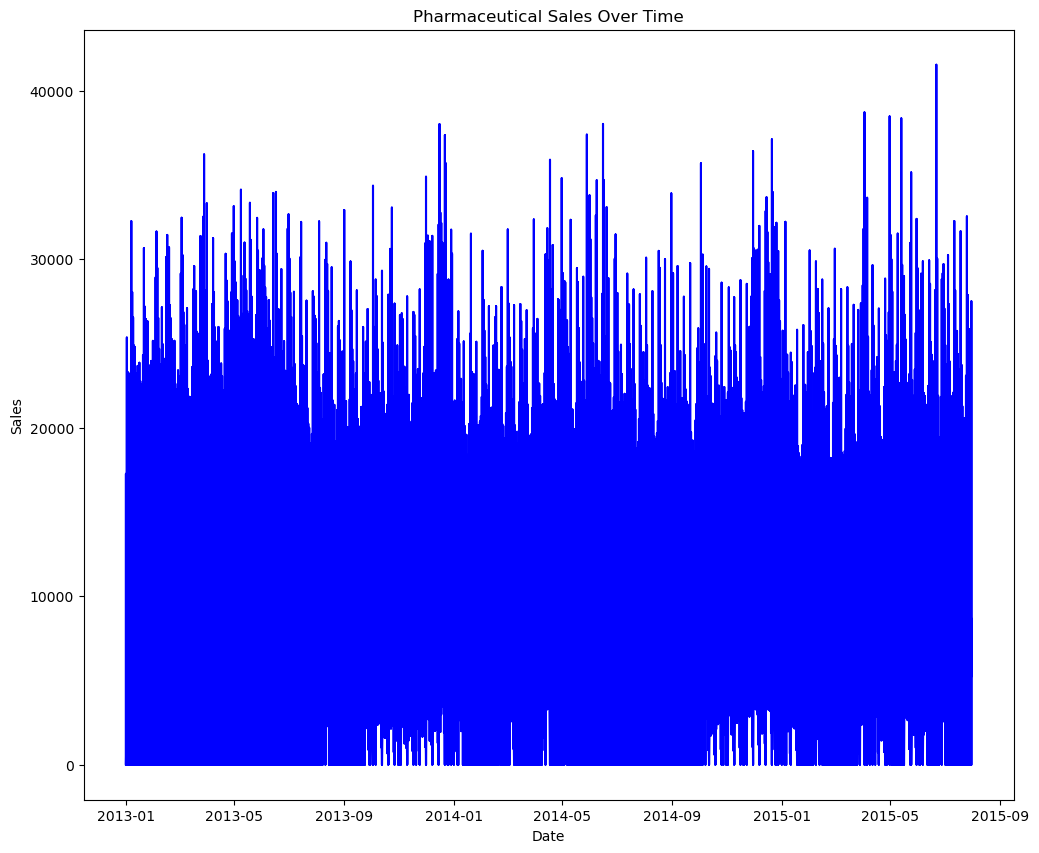

In [93]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the line using ax.plot instead of sns.lineplot
ax.plot(train_data1['Date'], train_data1['Sales'], label='Sales', color='b')

# Set the title and labels
ax.set_title('Pharmaceutical Sales Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Sales')

# Show the plot
plt.show()


In [94]:
# Define functions to identify specific holiday periods (e.g., Christmas and Easter)
def is_christmas(month, day):
    return (month == 12 and day >= 24) or (month == 12 and day <= 25)

def is_easter(month, day):
    # You'll need to determine the exact date calculation for Easter since it varies each year.
    pass

# Apply the functions to create binary flags for Christmas and Easter
train_data1['Is_Christmas'] = train_data1.apply(lambda row: is_christmas(row['Month'], row['Day']), axis=1)
train_data1['Is_Easter'] = train_data1.apply(lambda row: is_easter(row['Month'], row['Day']), axis=1)

In [95]:
# Prepare the data for modeling
X = train_data1[['Month', 'Day', 'Is_Christmas', 'Is_Easter']]
y = train_data1['Sales']

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 12807000.867624698


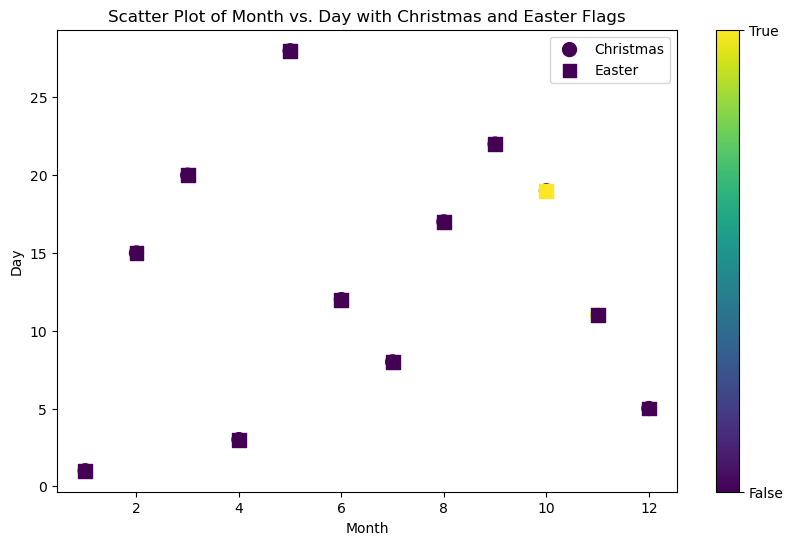

In [96]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with actual data)
month = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
day = [1, 15, 20, 3, 28, 12, 8, 17, 22, 19, 11, 5]
is_christmas = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
is_easter = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

# Define a function to plot scatter points for different holidays
def plot_scatter_with_flags(month, day, flag, label, marker, color_map):
    plt.scatter(month, day, c=flag, cmap=color_map, marker=marker, s=100, label=label)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot Christmas and Easter separately using the function
plot_scatter_with_flags(month, day, is_christmas, 'Christmas', 'o', 'viridis')
plot_scatter_with_flags(month, day, is_easter, 'Easter', 's', 'viridis')

# Add color bar
cbar = plt.colorbar()
cbar.set_ticks([0, 1])
cbar.set_ticklabels(['False', 'True'])

# Set axis labels and title
plt.xlabel('Month')
plt.ylabel('Day')
plt.title('Scatter Plot of Month vs. Day with Christmas and Easter Flags')

# Add legend
plt.legend()

# Show the plot
plt.show()


### correlation between sales and number of customers?

In [97]:
train=pd.read_csv("train.csv",encoding_errors="ignore")

In [98]:
train.dropna(inplace=True)

In [99]:
train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [100]:
# Extract the 'Sales' and 'Number_of_Customers' columns from the dataset
sales = train['Sales']
num_customers = train['Customers']

# Calculate the correlation coefficient between 'Sales' and 'Number_of_Customers'
correlation = sales.corr(num_customers)
print("Correlation Coefficient:", correlation)

Correlation Coefficient: 0.894710773301698


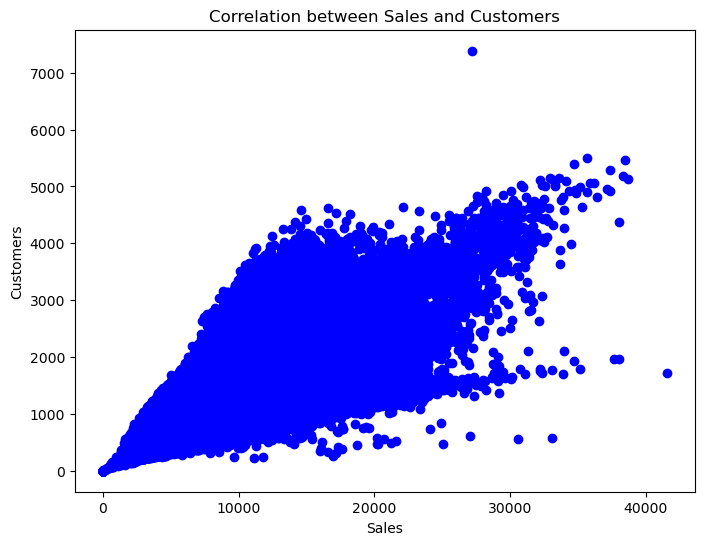

In [103]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the scatter plot using ax.scatter() for more control
ax.scatter(sales, num_customers, color='blue', marker='o')

# Set the axis labels and title
ax.set_xlabel('Sales')
ax.set_ylabel('Customers')
ax.set_title('Correlation between Sales and Customers')

# Show the plot
plt.show()


### How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?

In [102]:
# Extract year, month, and day from the 'Date' column
train_data1['Month'] =train_data1['Date'].dt.month
train_data1['Year'] =train_data1['Date'].dt.month
train_data1['Day'] = train_data1['Date'].dt.day

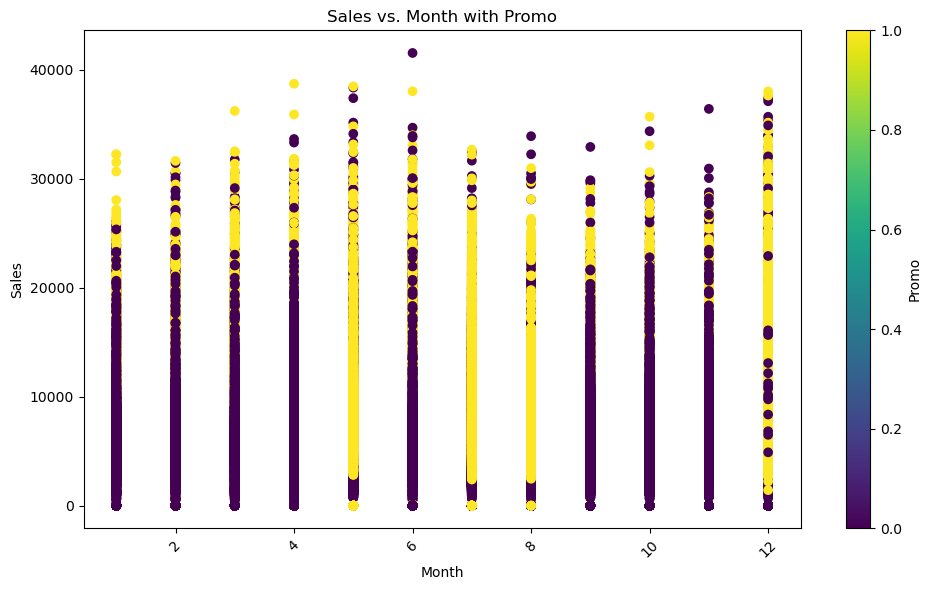

In [104]:
import matplotlib.pyplot as plt

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot
scatter = ax.scatter(train_data1["Month"], train_data1["Sales"], c=train_data1["Promo"], cmap='viridis', marker='o')

# Adding labels and title
ax.set_xlabel("Month")
ax.set_ylabel("Sales")
ax.set_title("Sales vs. Month with Promo")

# Adding colorbar for the Promo values
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label("Promo")

# Rotate x-axis labels if they're too long
plt.xticks(rotation=45)

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()


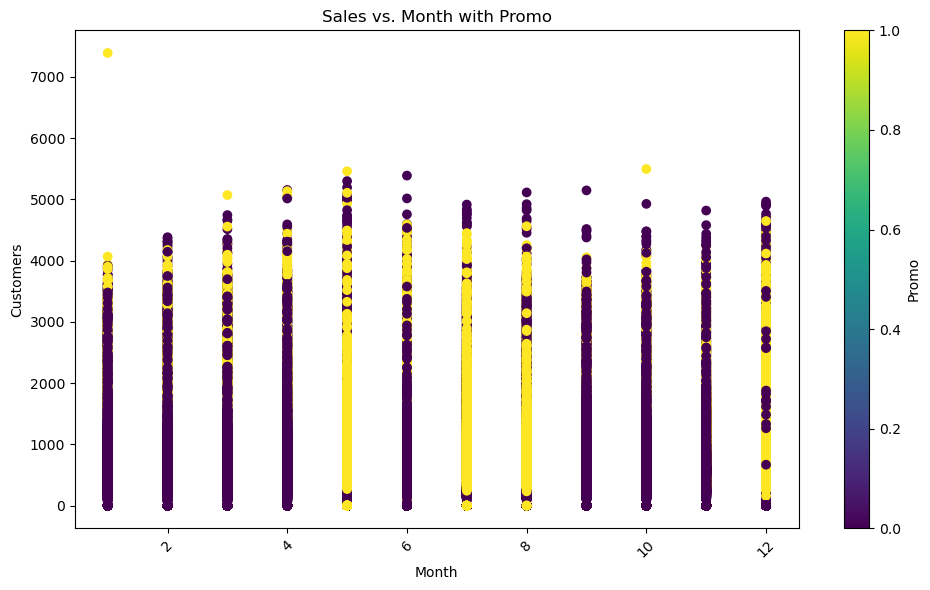

In [105]:
import matplotlib.pyplot as plt
train_data1
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.scatter(train_data1["Month"],train_data1["Customers"], c=train_data1["Promo"], cmap='viridis', marker='o')

# Adding labels and title
plt.xlabel("Month")
plt.ylabel("Customers")
plt.title("Sales vs. Month with Promo")

# Adding colorbar for the Promo values
cbar = plt.colorbar()
cbar.set_label("Promo")

plt.xticks(rotation=45)  # Rotate x-axis labels if they're too long
plt.tight_layout()

plt.show()

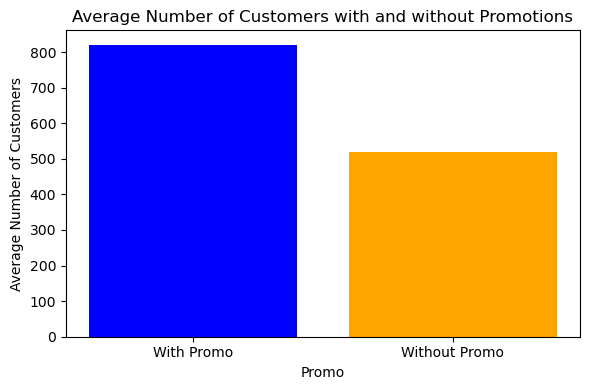

In [106]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the average number of customers with and without promotions
avg_customers_with_promo = train_data[train_data['Promo'] == 1]['Customers'].mean()
avg_customers_without_promo = train_data[train_data['Promo'] == 0]['Customers'].mean()

# Data for the bar plot
labels = ['With Promo', 'Without Promo']
values = [avg_customers_with_promo, avg_customers_without_promo]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 4))

# Create the bar plot using ax.bar
ax.bar(labels, values, color=['blue', 'orange'])

# Adding title and labels
ax.set_title('Average Number of Customers with and without Promotions')
ax.set_xlabel('Promo')
ax.set_ylabel('Average Number of Customers')

# Show the plot
plt.tight_layout()
plt.show()


### Could the promos be deployed in more effective ways? Which stores should promos be deployed in?

In [107]:
# Remove rows with missing values explicitly using dropna() for the entire dataframe
train_cleaned = train.dropna()

# Selecting features and target variables with a more manual assignment
X = train_cleaned.loc[:, ['Promo']]  # Features: 'Promo'
y = train_cleaned.loc[:, ['Sales']]  # Target: 'Sales'


In [108]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 12807000.867624698


Coefficient of Promo: 818.715715360555


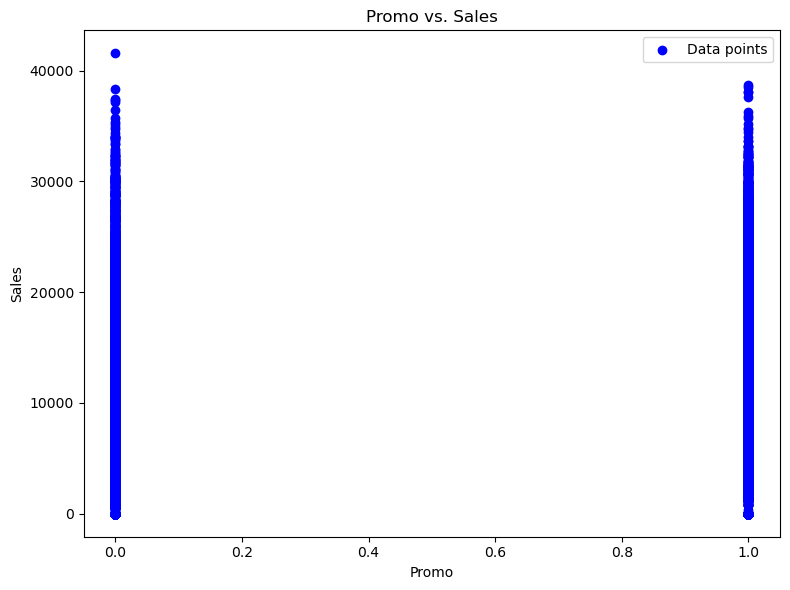

In [109]:
import matplotlib.pyplot as plt

# Get the model coefficient to understand the impact of 'Promo' on 'Sales'
promo_coef = model.coef_[0]
print(f"Coefficient of Promo: {promo_coef}")

# Create the plot using matplotlib instead of seaborn
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot of 'Promo' vs 'Sales'
ax.scatter(train['Promo'], train['Sales'], color='blue', label='Data points')

# Set the labels and title
ax.set_xlabel('Promo')
ax.set_ylabel('Sales')
ax.set_title('Promo vs. Sales')

# Add legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [110]:
# Group the data by 'Promo' and calculate the average number of customers during each period
avg_customers_by_promo = train.groupby('Promo')['Customers'].mean()

# Print the average number of customers during promo and non-promo periods
print("Average Customers During Promo Period:", avg_customers_by_promo[1])
print("Average Customers During Non-Promo Period:", avg_customers_by_promo[0])

Average Customers During Promo Period: 820.0988146773861
Average Customers During Non-Promo Period: 517.8235417537579


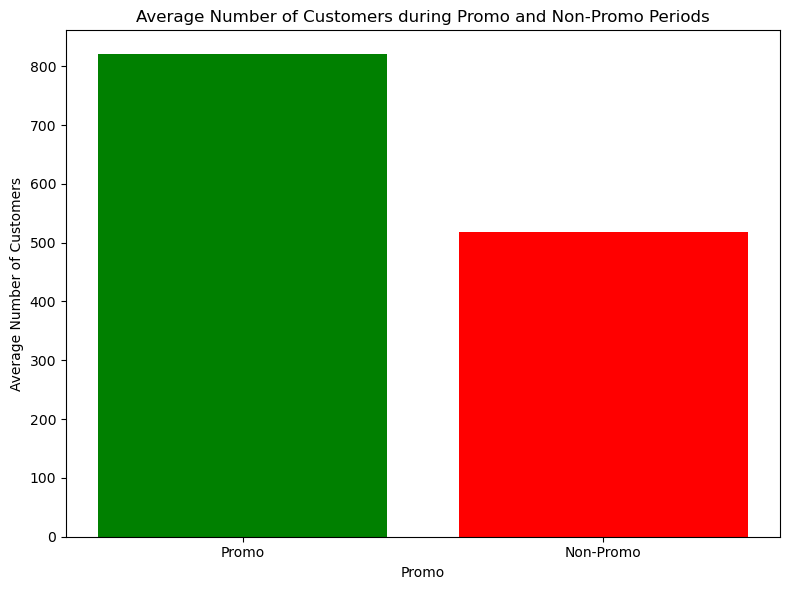

In [111]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the bar plot
labels = ['Promo', 'Non-Promo']
values = [avg_customers_by_promo[1], avg_customers_by_promo[0]]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create the bar plot using ax.bar() for more flexibility
ax.bar(labels, values, color=['green', 'red'])

# Add title and axis labels
ax.set_xlabel('Promo')
ax.set_ylabel('Average Number of Customers')
ax.set_title('Average Number of Customers during Promo and Non-Promo Periods')

# Show the plot
plt.tight_layout()
plt.show()


In [113]:
store_data

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [114]:
sample_data

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


### Trends of customer behavior during store open and closing times

In [115]:
train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [116]:
test_data

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [118]:
store_data

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [119]:
sample_data

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


In [120]:
# Convert the 'Date' column to datetime format
train_data['Date'] = pd.to_datetime(train_data['Date'])

# Extract the hour from the 'Date' column
train_data['Hour'] = train_data['Date'].dt.hour

# Group the data by the hour and calculate the average number of customers
average_customers_by_hour = train_data.groupby('Hour')['Customers'].mean()



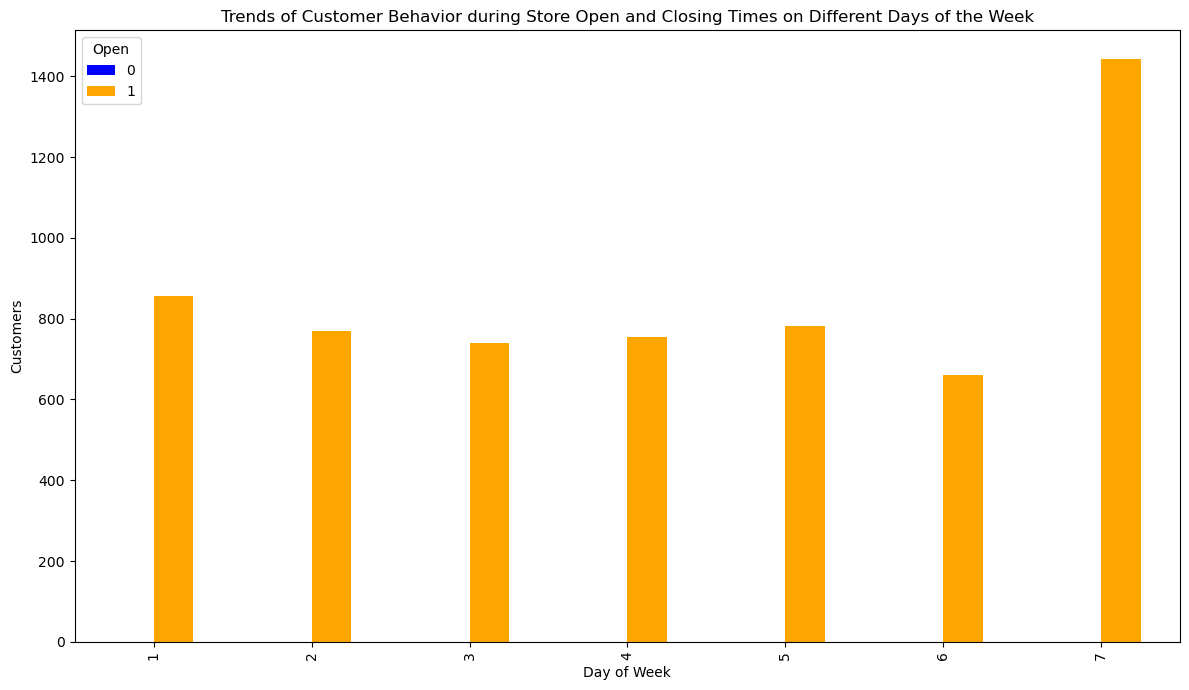

In [121]:
import matplotlib.pyplot as plt
import pandas as pd

# Group the data by 'DayOfWeek' and 'Open' to get average customers
grouped_data = train_data.groupby(['DayOfWeek', 'Open'])['Customers'].mean().unstack()

# Plot the bar plot using matplotlib
fig, ax = plt.subplots(figsize=(12, 7))

# Plotting bars for each 'Open' status, stacking them
grouped_data.plot(kind='bar', ax=ax, stacked=False, color=['blue', 'orange'])

# Set the labels and title
ax.set_xlabel('Day of Week')
ax.set_ylabel('Customers')
ax.set_title('Trends of Customer Behavior during Store Open and Closing Times on Different Days of the Week')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


### Which stores are opened on all weekdays? How does that affect their sales on weekends?

In [122]:
# stores opened in weekdays (open = 1)
week_data = train[['Store', 'DayOfWeek','Open', 'Sales','Customers']]
week_data = week_data[week_data['Open'] == 1]
storeW_data = week_data[['Store', 'DayOfWeek']].groupby('Store').nunique()
storeW_data = storeW_data[storeW_data['DayOfWeek'] == 7].reset_index()
storeW_data

,Store,DayOfWeek
0,85,7
1,122,7
2,209,7
3,259,7
4,262,7
5,274,7
6,299,7
7,310,7
8,335,7
9,353,7


In [123]:
weekends_data = week_data[week_data['Store'].isin(set(week_data['Store']))]
weekends_data.head()

,Store,DayOfWeek,Open,Sales,Customers
0,1,5,1,5263,555
1,2,5,1,6064,625
2,3,5,1,8314,821
3,4,5,1,13995,1498
4,5,5,1,4822,559


In [124]:
train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [125]:
weekday_counts = train.groupby('Store')['DayOfWeek'].nunique()

# Filter stores that are open on all weekdays (7 unique weekdays)
stores_open_all_weekdays = weekday_counts[weekday_counts == 7].index.tolist()

print("Stores Open on All Weekdays:")
print(stores_open_all_weekdays)

Stores Open on All Weekdays:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216

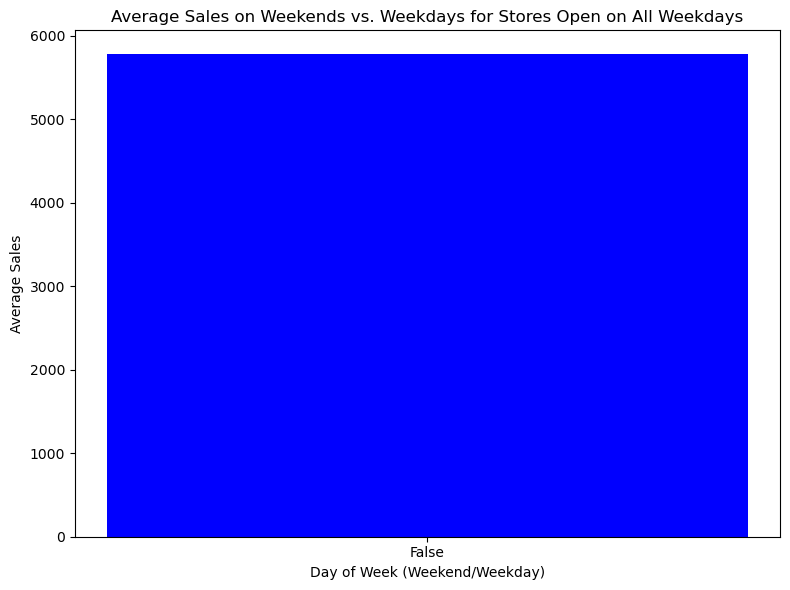

In [126]:
# Create a new column 'Is_Weekend' categorizing transactions as weekends or weekdays
train['Is_Weekend'] = train['DayOfWeek'].isin(['Saturday', 'Sunday'])

# Filter data for stores open on all weekdays
train_open_all_weekdays = train[train['Store'].isin(stores_open_all_weekdays)]

# Group the data by 'Is_Weekend' and calculate the average sales during weekends and weekdays
avg_sales_by_weekend = train_open_all_weekdays.groupby('Is_Weekend')['Sales'].mean()

# Create a bar plot using matplotlib
fig, ax = plt.subplots(figsize=(8, 6))

# Plot bars for weekends vs weekdays
ax.bar(avg_sales_by_weekend.index.astype(str), avg_sales_by_weekend.values, color=['blue', 'orange'])

# Set labels and title
ax.set_xlabel('Day of Week (Weekend/Weekday)')
ax.set_ylabel('Average Sales')
ax.set_title('Average Sales on Weekends vs. Weekdays for Stores Open on All Weekdays')

# Show the plot
plt.tight_layout()
plt.show()


### Check how the assortment type affects sales

In [127]:
store_data

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [128]:
train_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Hour
0,1,5,2015-07-31,9079.563741,555,1,1,After,1,0
1,2,5,2015-07-31,9079.563741,625,1,1,After,1,0
2,3,5,2015-07-31,9079.563741,821,1,1,After,1,0
3,4,5,2015-07-31,9079.563741,1498,1,1,After,1,0
4,5,5,2015-07-31,9079.563741,559,1,1,After,1,0
...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,6360.731180,0,0,0,Before,1,0
1017205,1112,2,2013-01-01,6360.731180,0,0,0,Before,1,0
1017206,1113,2,2013-01-01,6360.731180,0,0,0,Before,1,0
1017207,1114,2,2013-01-01,6360.731180,0,0,0,Before,1,0


In [129]:
import pandas as pd

# Merge 'train_data' with 'store_data' on 'Store' column, keeping only 'Store' and 'Assortment' from 'store_data'
merged_data = pd.merge(train_data, store_data[['Store', 'Assortment']], on='Store', how='inner')

# Select the required columns: 'Assortment' and 'Sales'
assort_data = merged_data.loc[:, ['Assortment', 'Sales']]

# Get the number of unique values in each column
unique_values = assort_data.apply(pd.Series.nunique)

# Print the result
print(unique_values)


Assortment    3
Sales         4
dtype: int64


In [130]:
print(assort_data['Sales'].describe())

count    1.017209e+06
mean     5.691257e+03
std      3.311617e+02
min      5.542015e+03
25%      5.542015e+03
50%      5.542015e+03
75%      5.542015e+03
max      9.079564e+03
Name: Sales, dtype: float64


In [131]:
mean_sales_by_assortment = assort_data.groupby('Assortment')['Sales'].mean()
print(mean_sales_by_assortment)

Assortment
a    5692.006226
b    5693.329573
c    5690.365419
Name: Sales, dtype: float64


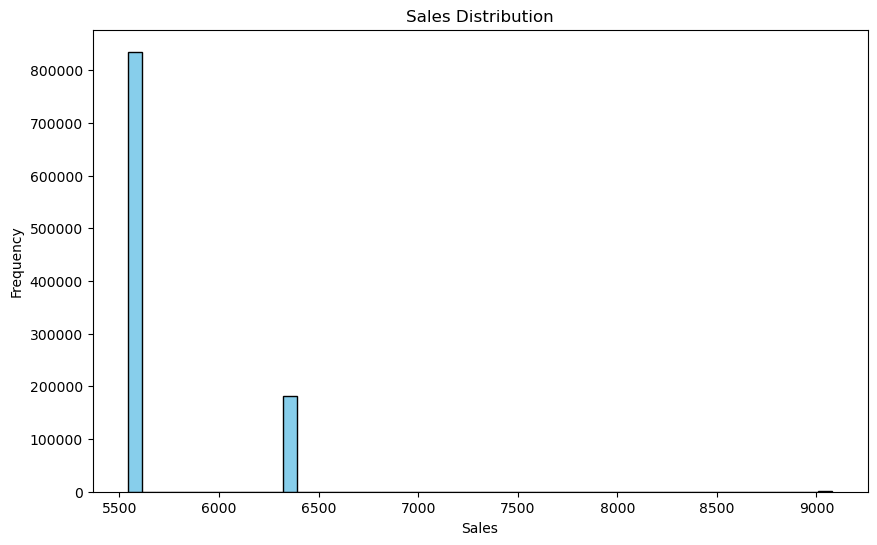

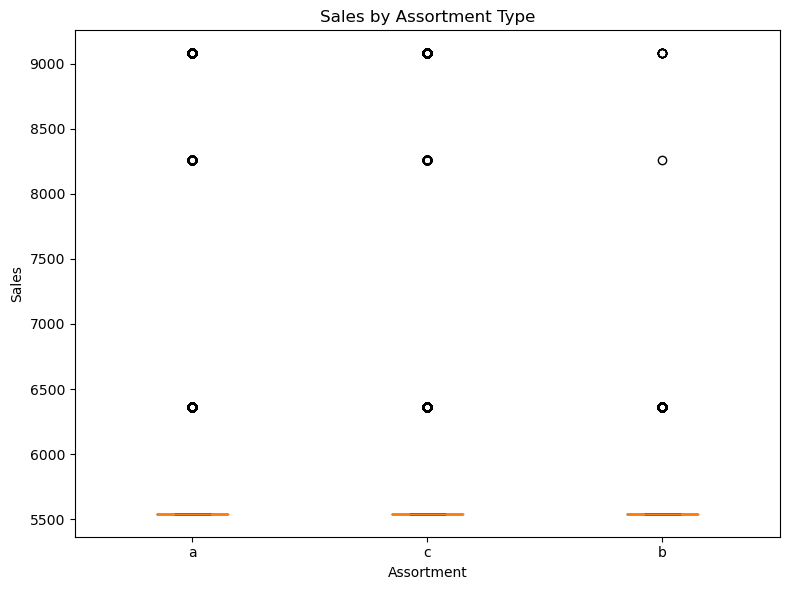

In [132]:
import matplotlib.pyplot as plt
import pandas as pd

# Histogram of Sales distribution
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(assort_data['Sales'], bins=50, color='skyblue', edgecolor='black')
ax.set_xlabel('Sales')
ax.set_ylabel('Frequency')
ax.set_title('Sales Distribution')
plt.show()

# Box plot of Sales by Assortment type
fig, ax = plt.subplots(figsize=(8, 6))

# Manually prepare data for boxplot by grouping 'Sales' by 'Assortment'
assortment_sales = [assort_data[assort_data['Assortment'] == a]['Sales'] for a in assort_data['Assortment'].unique()]

# Plot the boxplot
ax.boxplot(assortment_sales, labels=assort_data['Assortment'].unique())
ax.set_xlabel('Assortment')
ax.set_ylabel('Sales')
ax.set_title('Sales by Assortment Type')

plt.tight_layout()
plt.show()


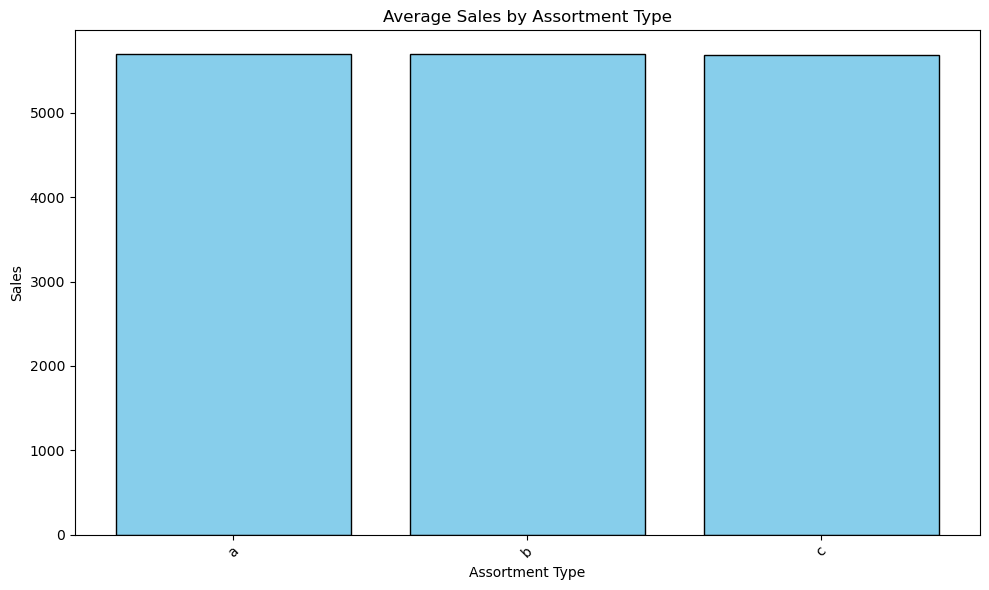

In [133]:
import matplotlib.pyplot as plt
import pandas as pd

# Group by 'Assortment' and calculate the mean of 'Sales'
avg_sales_by_assortment = assort_data.groupby('Assortment')['Sales'].mean().reset_index()

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Manually create the bar plot using ax.bar
ax.bar(avg_sales_by_assortment['Assortment'], avg_sales_by_assortment['Sales'], color='skyblue', edgecolor='black')

# Add labels and title
ax.set_xlabel('Assortment Type')
ax.set_ylabel('Sales')
ax.set_title('Average Sales by Assortment Type')

plt.xticks(rotation=45)  # Rotate x-axis labels for readability if necessary
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


# TASK 1.2 - Logging

In [135]:
import logging
# Configure the logging settings
logging.basicConfig(filename='logfile.log', level=logging.INFO, filemode='w', format='%(asctime)s - %(levelname)s - %(message)s - %(lineno)d')

In [136]:
#  Create a logger object
logger = logging.getLogger()
logger = logging.getLogger("my_logger")

In [137]:
logger.setLevel(logging.DEBUG)

In [138]:
# Creating and configuring handlers
file_handler = logging.FileHandler("app.log")
console_handler = logging.StreamHandler()

In [139]:
# Setting the log level for each handler
file_handler.setLevel(logging.ERROR)
console_handler.setLevel(logging.DEBUG)

In [140]:
# Creating a formatter
formatter = logging.Formatter("%(asctime)s - %(name)s - %(levelname)s - %(message)s")

In [141]:
# Setting the formatter for each handler
file_handler.setFormatter(formatter)
console_handler.setFormatter(formatter)

In [142]:
# Attaching the handlers to the logger
logger.addHandler(file_handler)
logger.addHandler(console_handler)

In [143]:
# Logging messages
logger.debug("This is a debug message")
logger.info("This is an info message")
logger.warning("This is a warning message")
logger.error("This is an error message")
logger.critical("This is a critical message")

2024-11-17 15:44:10,614 - my_logger - DEBUG - This is a debug message
2024-11-17 15:44:10,619 - my_logger - INFO - This is an info message
2024-11-17 15:44:10,620 - my_logger - WARNING - This is a warning message
2024-11-17 15:44:10,620 - my_logger - ERROR - This is an error message
2024-11-17 15:44:10,620 - my_logger - CRITICAL - This is a critical message


In [144]:
def my_function():
    logger.info('Starting my_function...')

    try:
        # Your code logic here
        result = 10 / 2
        logger.info('Result: %s', result)
    except Exception as e:
        logger.error('An error occurred: %s', str(e))
    finally:
        logger.info('Finished my_function.')

In [145]:
if __name__ == "__main__":
    # Your main code here
    logger.info('Program started.')
    my_function()
    logger.info('Program finished.')

2024-11-17 15:44:38,262 - my_logger - INFO - Program started.
2024-11-17 15:44:38,266 - my_logger - INFO - Starting my_function...
2024-11-17 15:44:38,266 - my_logger - INFO - Result: 5.0
2024-11-17 15:44:38,266 - my_logger - INFO - Finished my_function.
2024-11-17 15:44:38,273 - my_logger - INFO - Program finished.


In [146]:
logger.debug('this is debug')

2024-11-17 15:44:49,293 - my_logger - DEBUG - this is debug


In [147]:
logger.info('this is info')

2024-11-17 15:44:59,940 - my_logger - INFO - this is info


In [148]:
logger.warning('this is warning')

2024-11-17 15:45:09,642 - my_logger - WARNING - this is warning


In [149]:
logger.error("This is error")

2024-11-17 15:45:18,388 - my_logger - ERROR - This is error


In [150]:
logger.critical('this is critical')

2024-11-17 15:45:30,455 - my_logger - CRITICAL - this is critical
